# Gyakorlat 1
## Lineáris regresszió egy változóval:
### Profit a városban:
Ebben a feladatban egy egyváltozós lineáris regressziót fogunk implementálni, melynek segítségével képesek leszünk a profit predikciójára egy élelmiszerellátó egységnek. Képzeljük el, hogy CEO vagyunk egy élelmiszerláncnál és azon gondolkodunk, hogy vajon megérné -e nyitnunk egy új üzletet egy másik városokban. Az élelmiszerláncolatnak már megvan az ehhez szükséges feltételei csak el kéne dönteni, melyik városban bővüljön. Ehhez segítségünkre lesz a cég által begyűjtött adathalmaz a városok népességéről és a várható profitról.

Jelen esetünkben használjuk az alábbbi modellt:

$ h_{w}(x) = w_{0} + xw_{1} $

Ilyenkor a költségfüggvényünk (Cost function) az alábbi módon kapható meg MSE (Mean Squared Error) segítségével:

$ C(w_{0},w_{1})=\frac{1}{2m} \cdot \sum(w_{0} + x^iw_{1} − y^{i})^2 $
 
Itt a becslésünk hibáját négyzetre emelve összegeztük!

Ha áttérünk a vektoros leírásmódra az alábbit kapjuk:

$ C = \frac{1}{2m} \cdot \sum(XW-Y)^2 $

A költségfüggvényt deriválva megkapjuk a gradienst, amire a gradiensmódszer használatához lesz szükségünk. Itt fogjuk szimultán updatelni a megfelelő súlyainkat az alábbi módon:

$ temp = \frac{1}{m} \cdot \sum (h_{w}(x^{i}) - y^{i}) $

$ w_1 = \frac{1}{m} \cdot \sum(h_{w}(x^{i}) - y^{i} \cdot x_{1}^{i}) $

$ w_0 = temp $

ezt addig folytatjuk, amíg konvergenciához nem érünk. [HINT](http://www.google.com "Hint: -ide írhatsz, de ez link")

### Első lépésként importáljuk be a fontos csomagokat.
Szükségünk lesz a matplotlib bizonyos elemeire és a NumPy -ra.

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

### Második lépésként az adatainkat olvassuk be fileból:

In [8]:
file=open("ex1data1.txt",'r')
lines=file.readlines()
file.close()                    
# Fontos, hogy egy buborékba legyen a megnyitás és lezárás. Egyéb esetekben nem várt hibát okozhat.
# Ha a data file a main file mellett van egyszerűen megy a beolvasás. 
# Bonyolultabb fájlstruktúra esetén az egész elérési utat meg kell adni

In [9]:
print(lines)

['6.1101,17.592\n', '5.5277,9.1302\n', '8.5186,13.662\n', '7.0032,11.854\n', '5.8598,6.8233\n', '8.3829,11.886\n', '7.4764,4.3483\n', '8.5781,12\n', '6.4862,6.5987\n', '5.0546,3.8166\n', '5.7107,3.2522\n', '14.164,15.505\n', '5.734,3.1551\n', '8.4084,7.2258\n', '5.6407,0.71618\n', '5.3794,3.5129\n', '6.3654,5.3048\n', '5.1301,0.56077\n', '6.4296,3.6518\n', '7.0708,5.3893\n', '6.1891,3.1386\n', '20.27,21.767\n', '5.4901,4.263\n', '6.3261,5.1875\n', '5.5649,3.0825\n', '18.945,22.638\n', '12.828,13.501\n', '10.957,7.0467\n', '13.176,14.692\n', '22.203,24.147\n', '5.2524,-1.22\n', '6.5894,5.9966\n', '9.2482,12.134\n', '5.8918,1.8495\n', '8.2111,6.5426\n', '7.9334,4.5623\n', '8.0959,4.1164\n', '5.6063,3.3928\n', '12.836,10.117\n', '6.3534,5.4974\n', '5.4069,0.55657\n', '6.8825,3.9115\n', '11.708,5.3854\n', '5.7737,2.4406\n', '7.8247,6.7318\n', '7.0931,1.0463\n', '5.0702,5.1337\n', '5.8014,1.844\n', '11.7,8.0043\n', '5.5416,1.0179\n', '7.5402,6.7504\n', '5.3077,1.8396\n', '7.4239,4.2885\n', 

Rendezzük a adatainkat a megfelelő változókba:
- X és Y
- soronként kiszedjük és formázzuk az adatokat
- NumPy tömböt készítünk az X és Y -ból
- m -be elmentjük az adatok számát

In [10]:
X=[]
Y=[]
for line in lines:
  a,b = line.split(',')
  X.append(float (a))
  Y.append(float(b))

X=np.array(X)
Y=np.array(Y)
m=Y.size

Kiirathatjuk a formázott adatokat és a tömbök méreteit, csak hogy biztosak lehessünk azok helyességében:

In [18]:
print('X dimenziója:', X.shape, '; X értékei:\n', X, '\n')                
print('Y dimenziója:', Y.shape, '; Y értékei:\n', Y, '\n')
print('Az adatok száma: ', m)

X dimenziója: (97,) ; X értékei:
 [ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369] 

Y dimenziója: (97,) ; Y értékei:
 [17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.

Rajzoltassuk is ki:

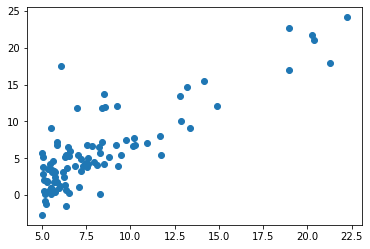

In [19]:
plt.plot(X,Y,'o')
plt.show()

A tömb formátumok még nem az igaziak, így az $X$ és $Y$ tömböket formázuk szép tömbbé, hogy a második dimenzió is rögzüljön. Majd inicializáljuk a kezdeti paramétereket:
- súlyok
- epochok száma
- tanulási ráta

In [21]:
X=np.column_stack((np.ones(m),X))  
Y=Y.reshape(97,1)                  

w=np.zeros((2,1))                 
epochs= 1500                       
learning_rate=0.01

Ellenőrizzük le a tömbjeink dimenzióját a mátixműveletek előtt.

In [23]:
print('X dimenziója:\n', X.shape)                
print('Y dimenziója:\n', Y.shape)
print('w dimenziója:\n', w.shape)

X dimenziója:
 (97, 2)
Y dimenziója:
 (97, 1)
w dimenziója:
 (2, 1)


Definiáljuk a költségfüggvény kiszámolására egy függvényt, amely bemenő paraméterként megkapja az $X$, $Y$ és $w$ mátrixokat és a kiszámolt skalár költséggel tér vissza. Hasznos operátorok lehetnek:
- @  : element wise matrix multiplication
- ** : hatványozás

In [33]:
def computeCost(X,Y,w):
    m = Y.size
    C = np.sum((X@w - Y)**2, axis=None)/(2*m)
    return C

Próbáljuk is ki két értékre:

In [35]:
C=computeCost(X,Y,np.array([[0],[0]]).reshape((2,1)))
print('''Testing the cost function (Error function):
\tWith weights: w = [0;0]
\tExpected value (approx.) = 32.07
\tCost computed = ''',C)
C=computeCost(X,Y,np.array([[-1],[2]]))
print('''\n\tWith weights: w = [-1;2]
\tExpected value (approx.) = 54.24
\tCost computed = ''',C)

Testing the cost function (Error function):
	With weights: w = [0;0]
	Expected value (approx.) = 32.07
	Cost computed =  32.072733877455676

	With weights: w = [-1;2]
	Expected value (approx.) = 54.24
	Cost computed =  54.24245508201238


Definiáljuk a grádiens módszeres függvényünket is (rajzoltassuk ki a függvény belsejében a )


In [37]:
def gradientDescent(X, Y, w, learning_rate, epochs):
    m = Y.size
    C_history = np.zeros((epochs,1))

    for i in range(0,epochs):
        #VIGYÁZAT szimultán update!!!!!
        new_w=np.zeros((2,1))
        new_w[0] = w[0] - (learning_rate/m) * np.sum(X@w-Y, axis=None)
        new_w[1] = w[1] - (learning_rate/m) * np.sum((X@w-Y)*(X[:,1].reshape(97,1)), axis=None)
        w=neww.copy()
        C_history[i] =computeCost(X,Y,w)

   # plt.plot(range(0,C_history.size),C_history)
   # plt.show()

    return w

In [39]:
plt.plot(range(0,C_history.size),C_history)
plt.show()

NameError: name 'C_history' is not defined